In [2]:
import pandas as pd 


In [3]:
cd

/Users/juhyeon


In [4]:
pd.read_csv('card_transdata.csv')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
df = pd.read_csv('card_transdata.csv')
print('결측치')
print(df.isna().sum())

결측치
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [6]:
print('클래스 값 분포')
print(df.iloc[:,-1].value_counts())

클래스 값 분포
0.0    912597
1.0     87403
Name: fraud, dtype: int64


In [7]:
import numpy as np

In [8]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:
sns.set(rc = {"figure.figsize":(10, 6)}) #그래프 사이즈

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
df = pd.read_csv('card_transdata.csv')
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [11]:
df.shape

(1000000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

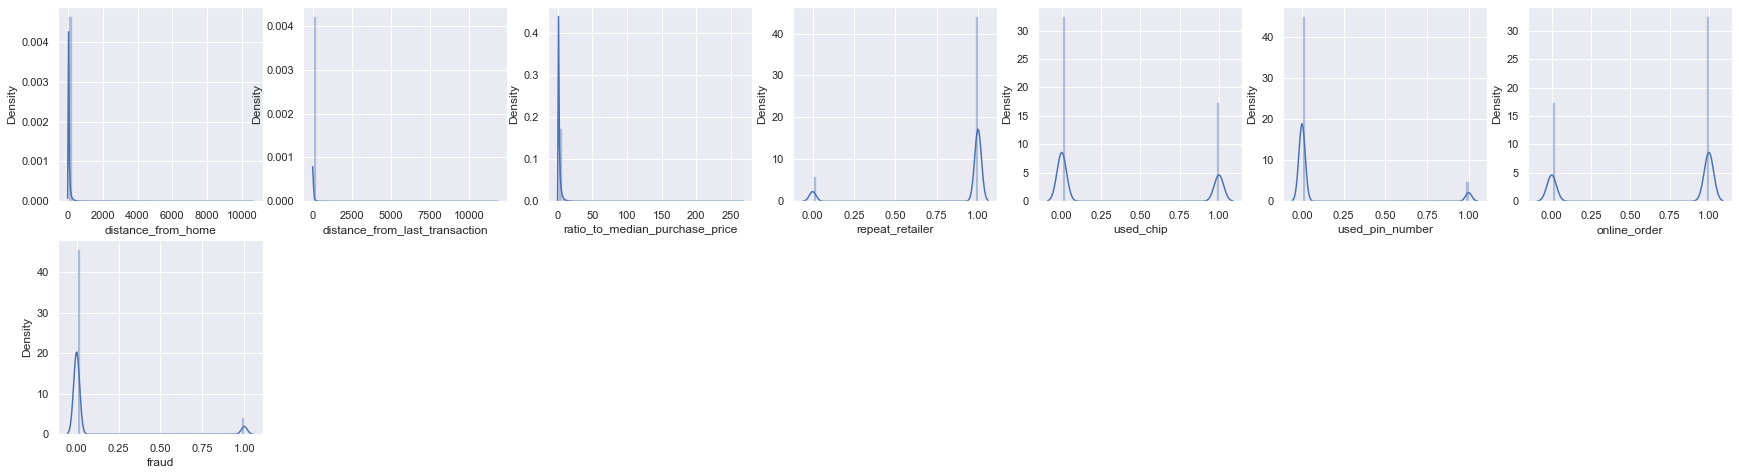

In [13]:
count=1
plt.subplots(figsize=(30,25))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df[i])
        count+=1

plt.show()

<AxesSubplot:>

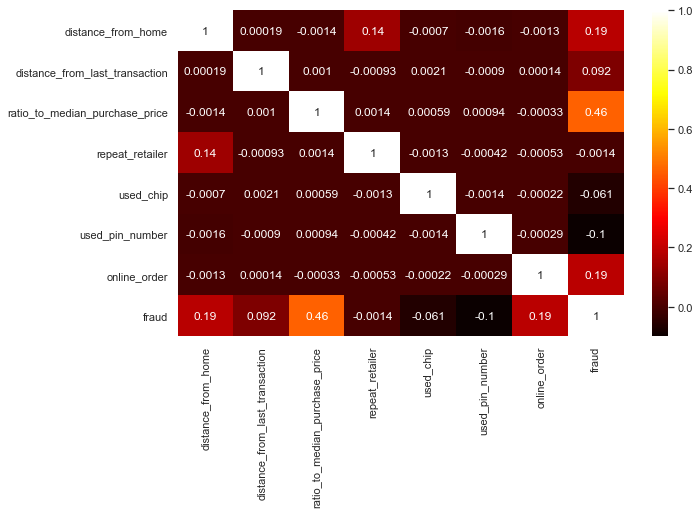

In [14]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

In [15]:
#다운 샘플링
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

df0 = pd.concat([real_resample, fraud_resample], axis = 0)

X = np.array(df0.drop(columns = "fraud"))
y = np.array(df0["fraud"])


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

# 정규화
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
                                                                    
rf = RandomForestClassifier(random_state = 5)
                                                                    
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17500,     2],
       [    0, 17460]])

In [17]:
precision_score(y_test, y_pred)


0.9998854655824075

Text(84.5, 0.5, 'Truth')

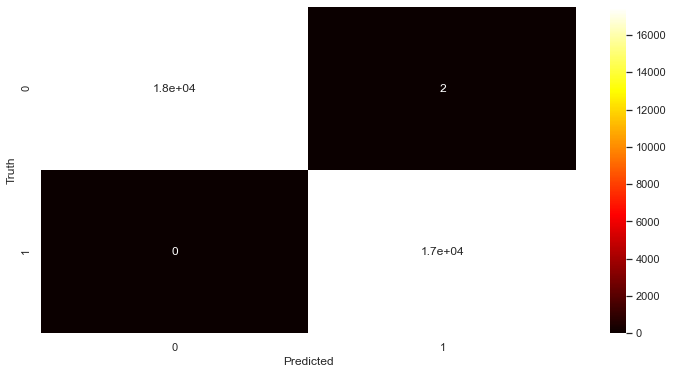

In [18]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
accuracy = rf.score(X_test, y_test)
print("RF Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

RF Accuracy: 0.999942795034609
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [20]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

df0 = pd.concat([real_resample, fraud_resample], axis = 0)

In [21]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)
 
df0 = pd.concat([real_resample, fraud_resample], axis = 0)

fraud
0.0    87403
1.0    87403
dtype: int64

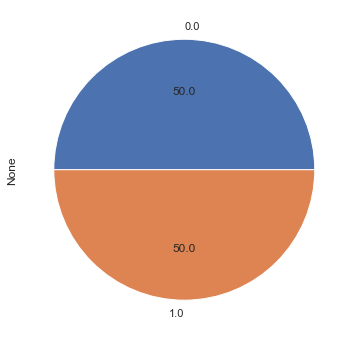

In [22]:
df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0.value_counts("fraud")

In [23]:
X = np.array(df0.drop(columns = "fraud"))
y = np.array(df0["fraud"])

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

In [25]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


In [26]:
train_accuracy = []
test_accuracy = []

In [28]:
for k in range(3, 16):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

ValueError: x and y must have same first dimension, but have shapes (13,) and (26,)

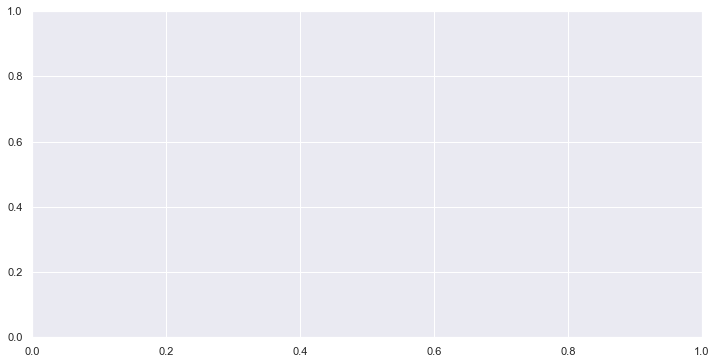

In [30]:
plt.figure(figsize = (12, 6))

plt.plot(range(3, 16), train_accuracy, label = "Train Score",
         marker = "o", markerfacecolor = "#00FF00", color = "#000000")

plt.plot(range(3, 16), test_accuracy, label = "Test Score", 
         marker = "o", markerfacecolor = "#FF0000", color = "#000000")

plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Train vs Test Score by Number of Neighbors")
plt.legend()
plt.show()
# *** k 수가 늘수록 정확도가 떨어지니까 k=3이 베스트***

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17417,    85],
       [   13, 17447]])

In [33]:
#정밀도
precision_score(y_test, y_pred)

0.9951517225644536

Text(84.5, 0.5, 'Truth')

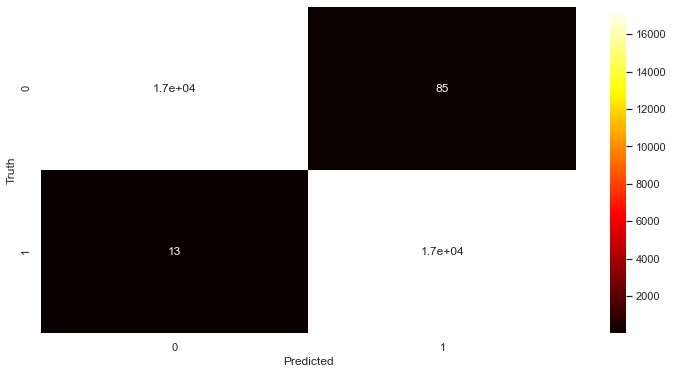

In [34]:
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "hot")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [35]:
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:",accuracy)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9971969566958412
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.9971993598536809